In [234]:
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns

In [235]:
users = pd.read_csv("users.csv")
purchases = pd.read_csv("purchases.csv")

In [236]:
print('users shape: ', users.shape)
print('purchases shape: ', purchases.shape)

users shape:  (10000, 6)
purchases shape:  (9006, 3)


In [237]:
users.head()

,uid,reg_date,device,gender,country,age
0,54030035,2017-06-29T00:00:00Z,and,M,USA,19
1,72574201,2018-03-05T00:00:00Z,iOS,F,TUR,22
2,64187558,2016-02-07T00:00:00Z,iOS,M,USA,16
3,92513925,2017-05-25T00:00:00Z,and,M,BRA,41
4,99231338,2017-03-26T00:00:00Z,iOS,M,FRA,59


In [238]:
purchases.head()

,date,uid,price
0,2017-07-10,41195147,499
1,2017-07-15,41195147,499
2,2017-11-12,41195147,599
3,2017-09-26,91591874,299
4,2017-12-01,91591874,599


In [239]:
users.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   uid       10000 non-null  int64 
 1   reg_date  10000 non-null  object
 2   device    10000 non-null  object
 3   gender    10000 non-null  object
 4   country   10000 non-null  object
 5   age       10000 non-null  int64 
dtypes: int64(2), object(4)
memory usage: 468.9+ KB


In [240]:
users['age'].describe()

count    10000.000000
mean        24.399200
std          9.772512
min         15.000000
25%         17.000000
50%         21.000000
75%         28.000000
max         84.000000
Name: age, dtype: float64

In [241]:
purchases.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9006 entries, 0 to 9005
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   date    9006 non-null   object
 1   uid     9006 non-null   int64 
 2   price   9006 non-null   int64 
dtypes: int64(2), object(1)
memory usage: 211.2+ KB


In [242]:
purchases['price'].describe()

count    9006.000000
mean      406.772596
std       187.918230
min        99.000000
25%       299.000000
50%       299.000000
75%       499.000000
max       899.000000
Name: price, dtype: float64

In [243]:
def is_unique(col):
  if col.shape[0] == col.nunique():
    print('Unique')
  else:
    print('Not Unique')
    print('Total Size: ', col.shape[0])
    print('Unique Size: ', col.nunique())

In [244]:
is_unique(users.uid)
print(10*"*")
is_unique(purchases.uid)

Unique
**********
Not Unique
Total Size:  9006
Unique Size:  1322


In [245]:
purchases.uid.value_counts()


67972857    28
41217161    28
82914310    26
83611817    25
44628001    25
            ..
41045336     1
23543063     1
97470516     1
20737349     1
50813295     1
Name: uid, Length: 1322, dtype: int64

In [246]:
df = users.merge(purchases, how='inner', on = 'uid')
df.head()

,uid,reg_date,device,gender,country,age,date,price
0,92513925,2017-05-25T00:00:00Z,and,M,BRA,41,2017-10-20,499
1,92513925,2017-05-25T00:00:00Z,and,M,BRA,41,2017-05-29,299
2,92513925,2017-05-25T00:00:00Z,and,M,BRA,41,2017-08-23,599
3,92513925,2017-05-25T00:00:00Z,and,M,BRA,41,2018-03-26,299
4,16377492,2016-10-16T00:00:00Z,and,M,BRA,20,2018-03-17,199


In [247]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9006 entries, 0 to 9005
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   uid       9006 non-null   int64 
 1   reg_date  9006 non-null   object
 2   device    9006 non-null   object
 3   gender    9006 non-null   object
 4   country   9006 non-null   object
 5   age       9006 non-null   int64 
 6   date      9006 non-null   object
 7   price     9006 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 633.2+ KB


In [248]:
agg_df = df.groupby(['country', 'device', 'gender' ,'age']).sum().sort_values(by='price', ascending = False)
agg_df.head(10)

uid  price
country device gender age                   
USA     and    M      15   7861820995  61550
BRA     and    M      19   5408294466  45392
DEU     iOS    F      16   4401291763  41602
USA     and    F      17   5428088815  40004
               M      23   5334915836  39802
        iOS    M      15   5677633580  39402
BRA     iOS    F      16   3694699613  37311
USA     and    F      21   7500454121  36905
                      20   5606621467  34401
BRA     and    F      15   3700412339  33824

In [249]:
agg_df.reset_index(inplace=True)
agg_df.head()

,country,device,gender,age,uid,price
0,USA,and,M,15,7861820995,61550
1,BRA,and,M,19,5408294466,45392
2,DEU,iOS,F,16,4401291763,41602
3,USA,and,F,17,5428088815,40004
4,USA,and,M,23,5334915836,39802


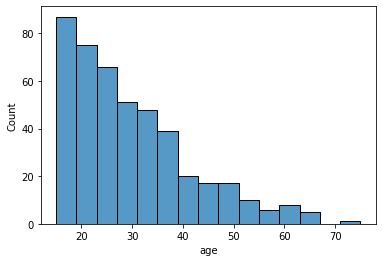

In [250]:
sns.histplot(agg_df['age'])

In [251]:
bins = [0, 18, 25, 35, 50, agg_df["age"].max()]
labels = ["0_18", "19_23", "24_30", "31_40", "41_" + str(agg_df["age"].max())]
agg_df['agg_cat'] = pd.cut(agg_df["age"], bins, labels=labels)

In [252]:
agg_df

,country,device,gender,age,uid,price,agg_cat
0,USA,and,M,15,7861820995,61550,0_18
1,BRA,and,M,19,5408294466,45392,19_23
2,DEU,iOS,F,16,4401291763,41602,0_18
3,USA,and,F,17,5428088815,40004,0_18
4,USA,and,M,23,5334915836,39802,19_23
...,...,...,...,...,...,...,...
445,BRA,iOS,F,34,51448171,199,24_30
446,CAN,and,F,27,28088851,199,24_30
447,USA,and,F,60,67768821,199,41_75
448,BRA,iOS,M,47,25192250,199,31_40


In [253]:
agg_df["customers_level_based"] = [row[0] + "_" + row[1].upper() + "_" + row[2] + "_" + row[6] for row in agg_df.values]
agg_df.head()

,country,device,gender,age,uid,price,agg_cat,customers_level_based
0,USA,and,M,15,7861820995,61550,0_18,USA_AND_M_0_18
1,BRA,and,M,19,5408294466,45392,19_23,BRA_AND_M_19_23
2,DEU,iOS,F,16,4401291763,41602,0_18,DEU_IOS_F_0_18
3,USA,and,F,17,5428088815,40004,0_18,USA_AND_F_0_18
4,USA,and,M,23,5334915836,39802,19_23,USA_AND_M_19_23


In [254]:
agg_df = agg_df[["customers_level_based", "price"]]
agg_df.head()

,customers_level_based,price
0,USA_AND_M_0_18,61550
1,BRA_AND_M_19_23,45392
2,DEU_IOS_F_0_18,41602
3,USA_AND_F_0_18,40004
4,USA_AND_M_19_23,39802


In [259]:
agg_df = agg_df.groupby("customers_level_based").agg({
    "price": "mean"
}).sort_values(by="price", ascending= False).reset_index()
agg_df["segment"] =  pd.qcut(agg_df["price"], 4, labels=["D","C","B","A"])
agg_df.head()

,customers_level_based,price,segment
0,USA_AND_M_0_18,32047.50,A
1,USA_AND_F_0_18,31321.75,A
2,USA_IOS_M_0_18,30774.25,A
3,USA_IOS_F_0_18,27332.50,A
4,BRA_AND_F_0_18,26460.50,A


In [270]:
new_user = "TUR_AND_M_19_23"
agg_df[agg_df["customers_level_based"] == new_user]

,customers_level_based,price,segment
34,TUR_AND_M_19_23,6985.4,B
